### Merged (Data1 & Data2) DT Implementation

In [1]:
import pandas as cloudEmail_pns
import warnings as cloudEmail_wns
cloudEmail_wns.filterwarnings('ignore')
import matplotlib.pyplot as cloudEmail_mpt

In [2]:
cloudEmail1 = cloudEmail_pns.read_csv('Research_data1.csv')
cloudEmail1

,Email Text,Email Type
0,disc uniformitarianism sex lang dick hudson ob...,1
1,side galicismos galicismo spanish term names i...,1
2,equistar deal tickets still available assist r...,1
3,hello hot lil horny toy one dream open minded ...,0
4,software incredibly low prices lower drapery s...,0
...,...,...
17533,rick moen crit confused thought gpl ed money p...,1
17534,date lonely housewife always wanted date lonel...,0
17535,request submitted access request anita dupont ...,1
17536,important prc mtg hi dorn john discovered rece...,1


In [3]:
cloudEmail2 = cloudEmail_pns.read_csv('Research_data2.csv')
cloudEmail2

,body,label
0,buck troubles caused small dimension soon beco...,1
1,upgrade sex pleasures techniques brightmade com,1
2,daily top cnn com top videos stories aug pm ed...,1
3,would anyone object removing list tld basicall...,0
4,welcomefastshippingcustomersupport http iwfna ...,1
...,...,...
39149,cnn alerts custom alert alert name custom aler...,1
39150,cnn alerts custom alert alert name custom aler...,1
39151,hello great work slide show viewer application...,0
39152,mail sender coming intuit com servers subject ...,0


In [4]:
cloudEmail2.rename(columns={
    'body': 'Email Text',
    'label': 'Email Type',
}, inplace=True)

print("\nDataFrame after renaming columns:")
print(cloudEmail2)


DataFrame after renaming columns:
                                              Email Text  Email Type
0      buck troubles caused small dimension soon beco...           1
1        upgrade sex pleasures techniques brightmade com           1
2      daily top cnn com top videos stories aug pm ed...           1
3      would anyone object removing list tld basicall...           0
4      welcomefastshippingcustomersupport http iwfna ...           1
...                                                  ...         ...
39149  cnn alerts custom alert alert name custom aler...           1
39150  cnn alerts custom alert alert name custom aler...           1
39151  hello great work slide show viewer application...           0
39152  mail sender coming intuit com servers subject ...           0
39153  dear fellow pythonistas guido accepted user si...           0

[39154 rows x 2 columns]


In [5]:
cloudEmail = cloudEmail_pns.concat([cloudEmail1, cloudEmail2], axis=0) ###---- merging two datasets
cloudEmail

,Email Text,Email Type
0,disc uniformitarianism sex lang dick hudson ob...,1
1,side galicismos galicismo spanish term names i...,1
2,equistar deal tickets still available assist r...,1
3,hello hot lil horny toy one dream open minded ...,0
4,software incredibly low prices lower drapery s...,0
...,...,...
39149,cnn alerts custom alert alert name custom aler...,1
39150,cnn alerts custom alert alert name custom aler...,1
39151,hello great work slide show viewer application...,0
39152,mail sender coming intuit com servers subject ...,0


In [6]:
cloudEmail['Email Type'].value_counts()

Email Type
1    32822
0    23870
Name: count, dtype: int64

In [7]:
from collections import Counter as cloudEmail_balanceCount
from imblearn.over_sampling import SMOTE as cloudEmail_balanceSmote
from sklearn.feature_extraction.text import TfidfVectorizer as cloudEmail_TFVNumerical

cloudEmail.dropna(subset=['Email Text'], inplace=True)
cloudEmail_X1 = cloudEmail['Email Text']
cloudEmail_y1 = cloudEmail['Email Type']

cloudTFMod = cloudEmail_TFVNumerical(analyzer='word', ngram_range=(1, 1))
cloudEmail_X1 = cloudTFMod.fit_transform(cloudEmail_X1)
print("Merged Research Data Numerical Dimensions are : ", cloudEmail_X1.shape)

print('\nEmail Phishing Merged Data  %s' % cloudEmail_balanceCount(cloudEmail_y1))
cloudEmod = cloudEmail_balanceSmote()
cloudEmail_X1, cloudEmail_y1 = cloudEmod.fit_resample(cloudEmail_X1, cloudEmail_y1)
print('Balanced Email Phishing Merged Data %s' % cloudEmail_balanceCount(cloudEmail_y1))

Merged Research Data Numerical Dimensions are :  (56690, 230565)

Email Phishing Merged Data  Counter({1: 32822, 0: 23868})
Balanced Email Phishing Merged Data Counter({1: 32822, 0: 32822})


In [8]:
import joblib as cloudEmail_phishLib

# Save the TfidfVectorizer model with "3" in the filename
cloudEmail_phishLib.dump(cloudTFMod, "TfidfVectorizer_Model3.h5")
print("TfidfVectorizer model saved as TfidfVectorizer_Model3.h5")

loaded_TFIDF = cloudEmail_phishLib.load("TfidfVectorizer_Model3.h5")
print("TfidfVectorizer model loaded successfully.")


TfidfVectorizer model saved as TfidfVectorizer_Model3.h5
TfidfVectorizer model loaded successfully.


In [9]:
print("Merged Research Data Dimension Shape: ",cloudEmail_X1.shape)

Merged Research Data Dimension Shape:  (65644, 230565)


In [10]:
from sklearn.decomposition import PCA as cloudEmail_phishPCA

cloudPCA1 = cloudEmail_phishPCA(n_components = 30)
cloudEmail_X1 = cloudPCA1.fit_transform(cloudEmail_X1)
print("Merged Research Data Dimension Reduction Shape: ", cloudEmail_X1.shape)

cloudEmail_phishLib.dump(cloudPCA1, "PCA_Model3.h5")
print("PCA model saved as PCA_Model3.h5")
loaded_PCA = cloudEmail_phishLib.load("PCA_Model3.h5")
print("PCA model loaded successfully.")

Merged Research Data Dimension Reduction Shape:  (65644, 30)
PCA model saved as PCA_Model3.h5
PCA model loaded successfully.


In [11]:
from sklearn.model_selection import train_test_split as cloudEmail_phishSp
cloudEmail_X1tr, cloudEmail_X1ts, cloudEmail_y1tr, cloudEmail_y1ts = cloudEmail_phishSp(cloudEmail_X1, cloudEmail_y1, test_size=0.4, random_state=32)

In [12]:
print("60% Train Merged Data",cloudEmail_X1tr.shape)
print("40% Test Merged Data",cloudEmail_X1ts.shape)

60% Train Merged Data (39386, 30)
40% Test Merged Data (26258, 30)


In [13]:
from sklearn.model_selection import RandomizedSearchCV as cloudEmail_RDSCV
from sklearn.metrics import ConfusionMatrixDisplay as cloudEmail_phishDisp
from sklearn.metrics import confusion_matrix as cloudEmail_phishMatx
from sklearn.metrics import classification_report as cloudEmail_phishReport
from sklearn import metrics as cloudEmail_phishMetr
import time as cloudEmail_phishTime

In [14]:
from sklearn.tree import DecisionTreeClassifier as cloudEmail_phishDecisionTr
cloudParameters = {'criterion':['gini','entropy','log_loss'],'splitter': ['best','random'],'max_depth': [3,4,7,8]
                }
cloud_EmailMod = cloudEmail_phishDecisionTr(random_state=32)
cloud_EmailMod = cloudEmail_RDSCV(cloud_EmailMod, cloudParameters, cv=2)
cloud_EmailMod.fit(cloudEmail_X1tr[:800], cloudEmail_y1tr[:800])
print("\nRandomized Search Parameters for Decision Tree:\n",cloud_EmailMod.best_params_)


Randomized Search Parameters for Decision Tree:
 {'splitter': 'random', 'max_depth': 8, 'criterion': 'log_loss'}


In [15]:
##------ Training
Email_STime = cloudEmail_phishTime.time()
cloud_EmailMod = cloudEmail_phishDecisionTr(**cloud_EmailMod.best_params_)
cloud_EmailMod.fit(cloudEmail_X1tr, cloudEmail_y1tr)
Email_ENTime = cloudEmail_phishTime.time()
print("Time to Train Merged Data : ", Email_ENTime - Email_STime)

Time to Train Merged Data :  0.09855890274047852


Time to Test Merged Data :  0.007635354995727539
              precision    recall  f1-score   support

           0       0.65      0.97      0.78     13123
           1       0.93      0.49      0.64     13135

    accuracy                           0.73     26258
   macro avg       0.79      0.73      0.71     26258
weighted avg       0.79      0.73      0.71     26258



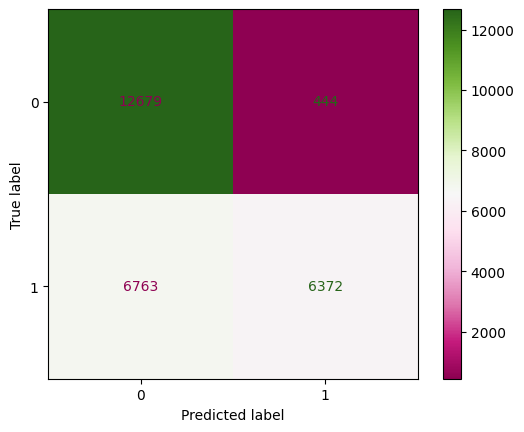

In [16]:
##------ Testing
Email_STime = cloudEmail_phishTime.time()
cloudEmail_yp = cloud_EmailMod.predict(cloudEmail_X1ts)
Email_ENTime = cloudEmail_phishTime.time()
print("Time to Test Merged Data : ", Email_ENTime - Email_STime)

print(cloudEmail_phishReport(cloudEmail_y1ts, cloudEmail_yp))
cloudMx = cloudEmail_phishMatx(cloudEmail_y1ts, cloudEmail_yp)
cloudEmail_phishDisp(confusion_matrix = cloudMx, display_labels = [0,1]).plot(cmap='PiYG')
cloudEmail_mpt.show()

In [17]:
import joblib as cloudEmail_phishLib
cloudEmail_phishLib.dump(cloud_EmailMod, "Email_DTModel3.h5")
cloud_EmailMod

DecisionTreeClassifier(criterion='log_loss', max_depth=8, splitter='random')